# Practic 3-4: Advanced Libraries and Visualization Techniques

This unified practice notebook covers two lectures:

**Part A – Advanced Plotting (Channels, Symbols, Forms)** and **Part B – Data Types**.

Each section contains brief explanations followed by exercises where you must **complete the code** yourself.

**General rules for this notebook:**
- Prefer perceptually effective encodings. Justify your choices.
- When comparing designs, add a short *why* paragraph.
- Keep code modular and reproducible.
- If a library is missing, add an install cell (`pip install ...`) at the top of the task.
- You should use at least **5 different libraries** across the tasks.

> If you see "TODO:" section or get `raise NotImplementedError`, replace it with working code.

**Recommended Libraries (choose across tasks):**
`pandas`, `numpy`, `matplotlib`, `plotly.express`, `altair`, `scikit-learn`, `networkx`, `statsmodels`, `scipy`, `vegafusion` (optional for Altair), `folium`.

> You do **not** need to use all of them; across 10 tasks, use **at least 5 different** libraries.

**Datasets**

> Most of the tasks already include a dataset. You can also use any of the following datasets:

- `sklearn.datasets` (wine, breast_cancer, digits, etc.)
- `plotly.express.data` (gapminder, iris, tips, carshare)
- `seaborn.load_dataset` (iris, flights, penguins, titanic) — *optional; only if seaborn is installed*
- Synthetic data you generate (time series, graphs, noisy measurements)


## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part A – Advanced Plotting (Channels, Symbols, Forms)

## 1. Channel Effectiveness: Position vs Length vs Color vs Size

**Goal:** Explore how visual channels affect accuracy for quantitative comparisons (Lecture 3: channel efficiency).
**Data:** Synthetic. Generate 30 pairs of values from the same distribution.


In [3]:
rng = np.random.default_rng(42)
n = 30
a = rng.normal(50, 12, n).round(1)
b = a * rng.normal(1.0, 0.15, n).round(2)

df = pd.DataFrame({'A': a, 'B': b})
df.head()


,A,B
0,53.7,70.884
1,37.5,35.250
2,59.0,54.280
3,61.3,53.944
4,26.6,28.994


In [5]:

# TODO: Plot A vs B using three encodings on separate figures:
# (1) Aligned position (scatter with y=x reference)
# (2) Bar lengths side-by-side for each pair (beware clutter; propose a smarter layout)
# (3) Color lightness encoding of delta = B-A (e.g., heatmap or strip with colormap)
# Compute and print MAE and RMSE between A and B; discuss which design best supports judging closeness.


MAE = 5.06
RMSE = 6.37


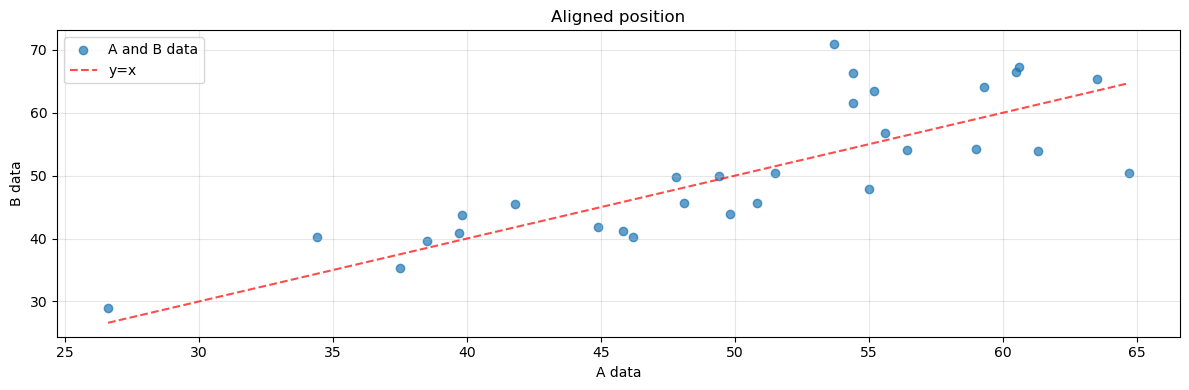

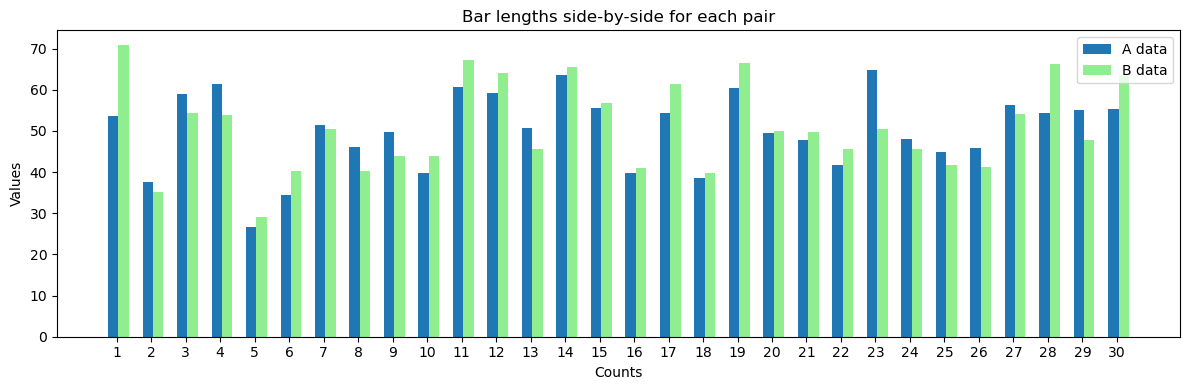

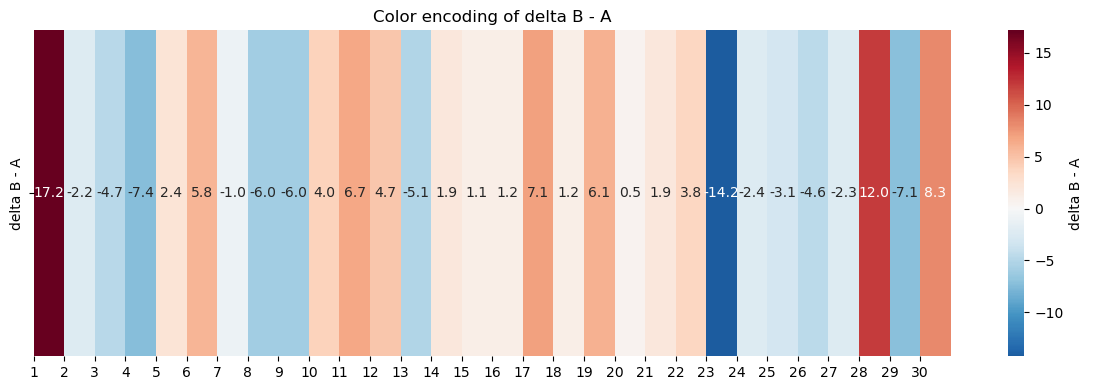

In [7]:
mae = np.mean(np.abs(df['B'] - df['A']))
rmse = np.sqrt(np.mean((df['B'] - df['A'])**2))
print(f'MAE = {mae:.2f}\nRMSE = {rmse:.2f}')

plt.figure(figsize=(12,4))
plt.scatter(df['A'],df['B'],alpha = 0.7, label = 'A and B data')
plt.plot([df['A'].min(), df['A'].max()],[df['A'].min(), df['A'].max()],'r--', alpha = 0.7,  label = 'y=x')
plt.xlabel('A data')
plt.ylabel('B data')
plt.legend()
plt.grid(alpha = 0.3)
plt.title('Aligned position')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
x_pos = np.arange(len(df))
plt.bar(x_pos-0.1, df['A'], width=0.3, align='center', label = 'A data')
plt.bar(x_pos+0.2, df['B'], width=0.3, align='center',  color = 'lightgreen', label = 'B data')
plt.xticks(x_pos, [f'{i+1}' for i in range(len(df))])
plt.legend()
plt.title('Bar lengths side-by-side for each pair')
plt.xlabel('Counts')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

df['delta B - A'] = df['B'] - df['A']

plt.figure(figsize=(12,4))
heatmap_data = df[['delta B - A']].T
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0, annot=True,fmt='.1f', cbar_kws={'label': 'delta B - A'}, linewidths=0)
plt.title('Color encoding of delta B - A')
plt.xticks(x_pos, [f'{i+1}' for i in range(len(df))])
plt.tight_layout()
plt.show()



### Results
1. Graph 1 (scatter plot) is the most visual for estimating proximity, since the points of spread from the reference line y=x show the measures of difference and the patterns of deviations are immediately visible.
2. Graph 2 (bar chart) is also quite representative, however, it does not show the relationship between A and B, and the general trend is not clear, since it is difficult to compare column lengths on a large amount of data.
3. In Graph 3, the scale of the values is lost because only the differences are visible. There is also no connection between the individual values.


> **To Do:** Try to explain which channel(s) made the comparison easiest and why (connect to alignment and Cleveland–McGill findings). No need to write code for accuracy measurement; just visual inspection is fine.

> According to the findings of the Cleveland–McGill study, a person recognizes a point diagram better because they directly compare the coordinates of the points relative to a common axis.

## 2. Redundant Encoding & Grouping

**Goal:** Test whether redundant encoding (e.g., color **and** shape) helps grouping without harming magnitude perception.

**Data:** `plotly.express.data.iris()`.

In [11]:
import plotly.express as px

iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


> `px.scatter(...)` and `px.ecdf(...)` can be useful.

In [ ]:

# TODO: Make two scatterplots of sepal_length vs petal_length:
# A) color only by species
# B) color + symbol by species (redundant encoding)
# Add marginal histograms or ECDFs to compare distributions per species.
# Write 3–5 sentences on cluster separability and whether redundancy improved decoding.


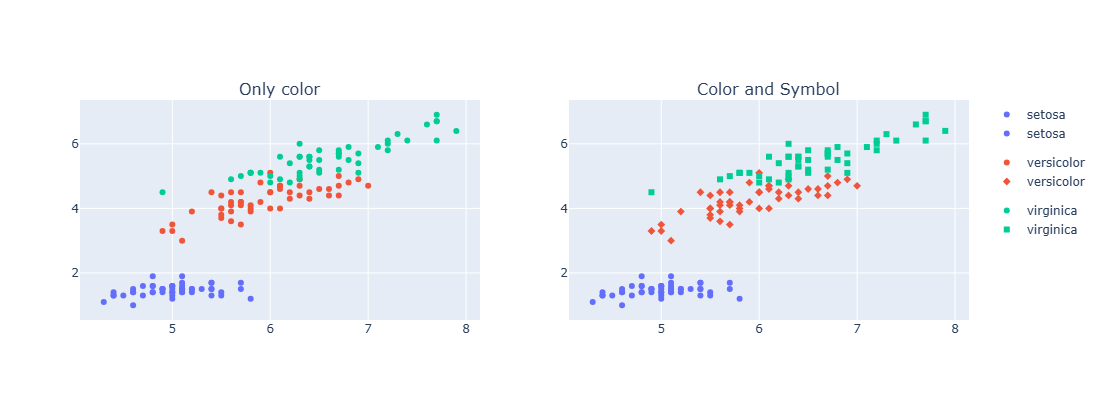

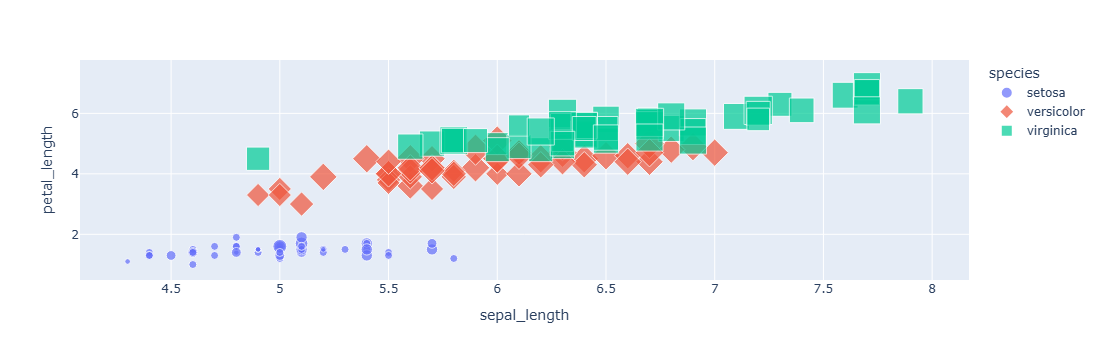

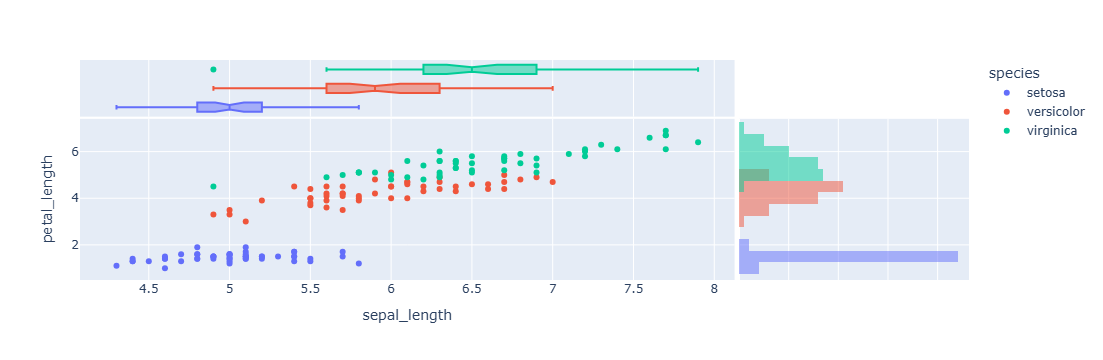

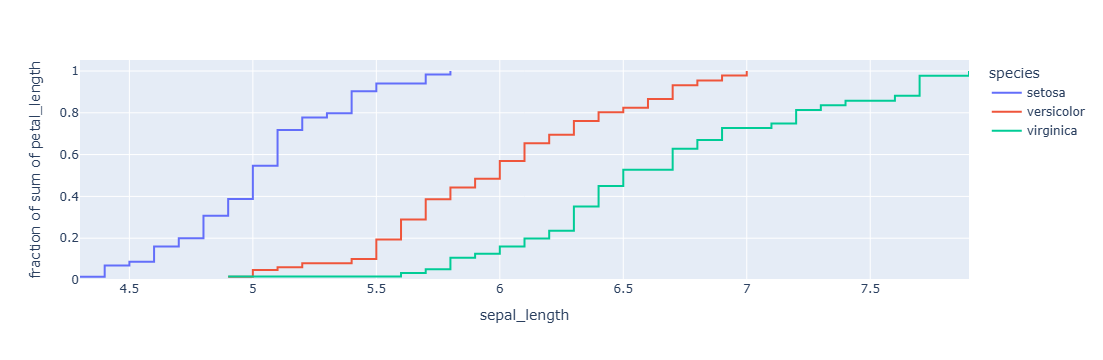

In [25]:
from plotly.subplots import make_subplots

fig_gen = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Only color", "Color and Symbol"),
    horizontal_spacing=0.1
)

fig1 = px.scatter(iris, x="sepal_length", y="petal_length", color="species", title="Separated only by colors")
for trace in fig1.data:
    fig_gen.add_trace(trace, row=1, col=1)

fig2 = px.scatter(iris, x="sepal_length", y="petal_length", color="species", symbol="species", hover_data=['sepal_width', 'petal_width'])
for trace in fig2.data:
    fig_gen.add_trace(trace, row=1, col=2)
fig_gen.update_layout(height=400, showlegend=True)
fig_gen.show()

fig = px.scatter(iris, x="sepal_length", y="petal_length", color="species", size='petal_width', symbol="species", hover_data=['sepal_width'])
fig.show()

fig = px.scatter(iris, x="sepal_length", y="petal_length", color="species", marginal_x="box", marginal_y="histogram")
fig.show()

fig = px.ecdf(iris, x="sepal_length",y="petal_length", color="species")
fig.show()

### Results
Clusters of iris species show good separability in the feature space of "sepal_length" and "petal_length", especially for the "setosa" species. Redundancy, which is created by adding marker symbols to color coding, significantly improves category decoding - double encoding makes species recognition more reliable and resistant to possible color perception problems. Additional visualizations such as marginal distributions and ECDF confirm the stable cluster structure of the data and show that the combination of multiple visual channels effectively supports the interpretation of complex multidimensional patterns.

## 3. Form Variability & Legend Design
**Goal:** Use distinct marker forms/line styles to encode categories, ensuring legible legends and minimal overload.

**Data:** Synthetic 5–7 categories with 100 points each.

In [28]:
rng = np.random.default_rng(7)
k = 6
sizes = rng.integers(60, 140, size=k)
centers = rng.uniform([-2,-2],[2,2], size=(k,2))
data = []
for i in range(k):
    pts = centers[i] + rng.normal(0, 0.55, size=(sizes[i],2))
    data.append(pd.DataFrame(pts, columns=['x','y']).assign(group=f'G{i+1}'))
df = pd.concat(data, ignore_index=True)
df.head()

,x,y,group
0,-0.716754,-1.538653,G1
1,-1.350860,-1.845007,G1
2,-1.808417,-1.812289,G1
3,-1.228471,-1.496430,G1
4,-0.949976,-0.713122,G1


> You can use simple combined plots with `matplotlib`. `plt.plot(subset['x'], subset['y'],...)` can be useful.

In [ ]:

# TODO: Map groups to a **limited** set of marker shapes and line styles (no more than ~6 distinct shapes).
# Create a clean, compact legend demonstrating the forms. Discuss trade-offs vs using color.
# Bonus: Create a custom legend artist that shows both marker and line style per group.


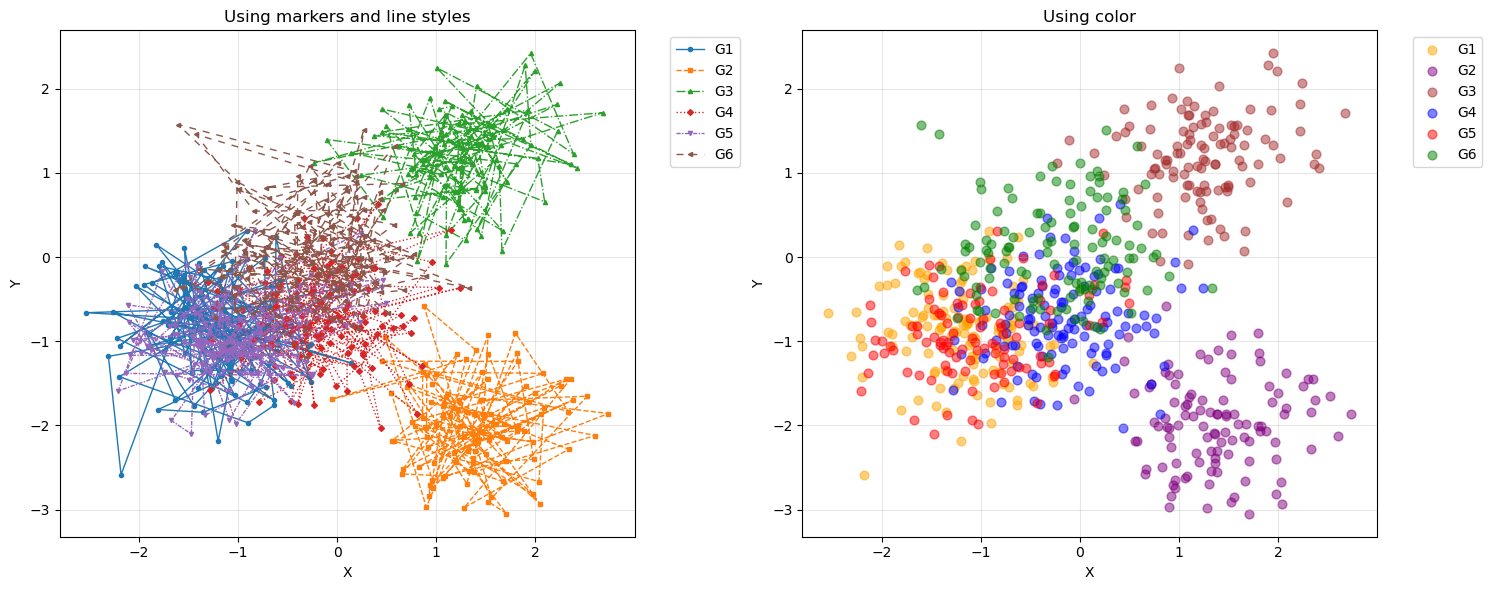

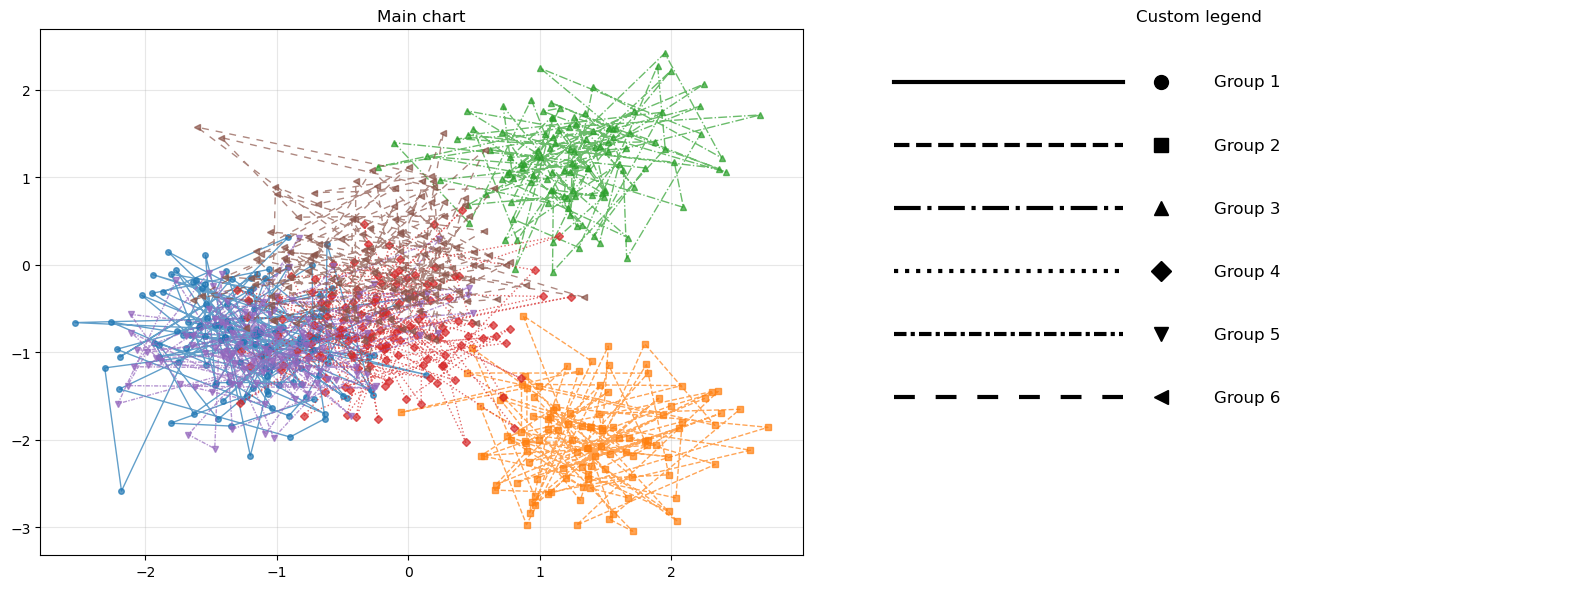

In [30]:
import matplotlib.lines as mlines
markers = ['o', 's', '^', 'D', 'v', '<']
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = [ 'orange', 'purple', 'brown', 'blue', 'red', 'green',]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
for i, group in enumerate(df['group'].unique()):
    group_data = df[df['group'] == group]
    ax1.plot(group_data['x'], group_data['y'], 
             marker=markers[i % len(markers)],
             linestyle=line_styles[i % len(line_styles)],
             markersize=3,
             linewidth=1,
             label=group)

ax1.set_title('Using markers and line styles')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(alpha=0.3)

for i, group in enumerate(df['group'].unique()):
    group_data = df[df['group'] == group]
    ax2.scatter(group_data['x'], group_data['y'], c=colors[i % len(colors)],s=40, alpha=0.5, label=group)

ax2.set_title('Using color')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, group in enumerate(df['group'].unique()):
    group_data = df[df['group'] == group]
    ax1.plot(group_data['x'], group_data['y'], 
             marker=markers[i % len(markers)],
             linestyle=line_styles[i % len(line_styles)],
             markersize=4,
             alpha = 0.7,
             linewidth=1)

ax1.set_title('Main chart')
ax1.grid(alpha=0.3)

ax2.axis('off')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_title('Custom legend')

legend_x = 0.1
legend_y = 0.9
line_length = 0.3
spacing = 0.12

for i in range(len(markers)):
    x_start = legend_x
    x_end = legend_x + line_length
    y_pos = legend_y - i * spacing
    ax2.plot([x_start, x_end], [y_pos, y_pos], linestyle=line_styles[i], color = 'black', linewidth=3)

    ax2.plot([x_end + 0.05], [y_pos], 
             marker=markers[i],
             markersize=10,
             color = 'black',
             linestyle='None')
    ax2.text(x_end + 0.12, y_pos, f'Group {i+1}', 
             va='center', fontsize=12)

plt.tight_layout()
plt.show()

### Results
1. The advantage of using markers and different line styles is that the graphics become distinguishable even with color perception problems, both for humans and for black and white printing.
2. The advantage of using only color coding is that it is possible to distinguish more categories, while the graph is not overloaded with visual noise.
3. The compromise between markers and color is understanding the specific task of data visualization (for example, black and white printing), as well as combining these two encodings.

## 4. Stevens' Power Law Calibration for Area
**Goal:** Calibrate area encodings so that numeric ratio `r` feels like ratio `r` perceptually.

**Data:** Synthetic ratios.

In [33]:
ratios = np.array([0.5, 0.75, 1, 1.5, 2, 3, 4])
# Hypothesis: perceived ~ k * (area)**a ; adjust 'a' so doubling numeric looks like doubling visually.
a_guess = 0.7  # TODO: explore values (0.6–1.0)
base = 1000.0  # base area in pt^2

areas = base * (ratios ** a_guess)
radii = np.sqrt(areas/np.pi)
radii

array([13.9979541 , 16.13230803, 17.84124116, 20.56160464, 22.73974353,
       26.20701171, 28.98318177])

In [35]:

# TODO: Plot circles with computed radii in a row. Add labels with numeric ratio.
# Experiment with different 'a' exponents; write which exponent makes doubling look most fair to you and why.
# (Optional) Fit 'a' by minimizing error between intended ratio and user-annotated perceived ratio.

# this is how it shoul be made
#for i,r in enumerate(radii):
#    circ = plt.Circle((i,0), r/50.0)  # scale for display
#    plt.gca().add_patch(circ)


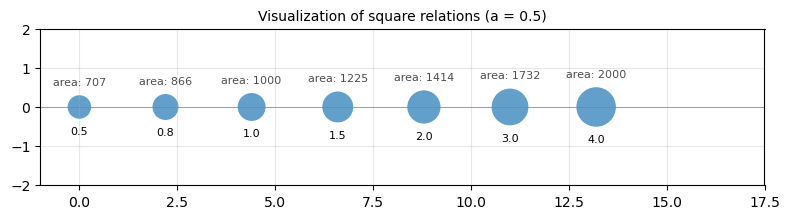

  Numerical ratio 2:1 → Area: 1.41:1, Radii: 1.19:1


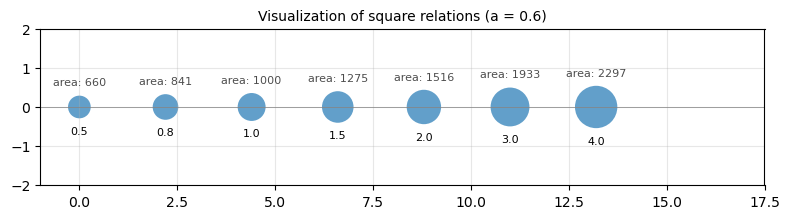

  Numerical ratio 2:1 → Area: 1.52:1, Radii: 1.23:1


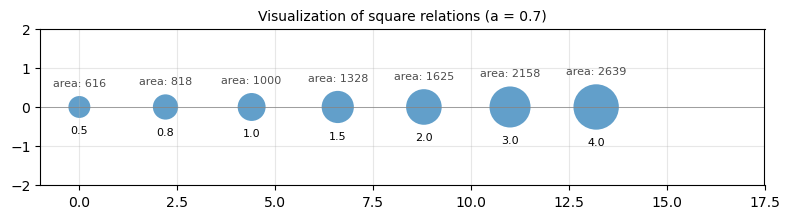

  Numerical ratio 2:1 → Area: 1.62:1, Radii: 1.27:1


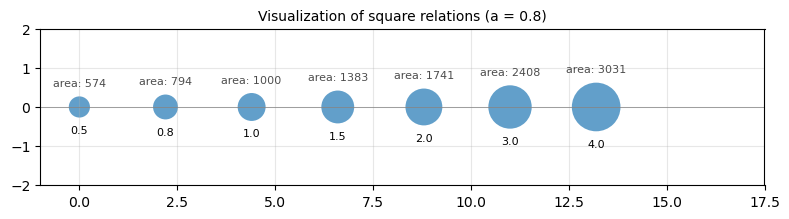

  Numerical ratio 2:1 → Area: 1.74:1, Radii: 1.32:1


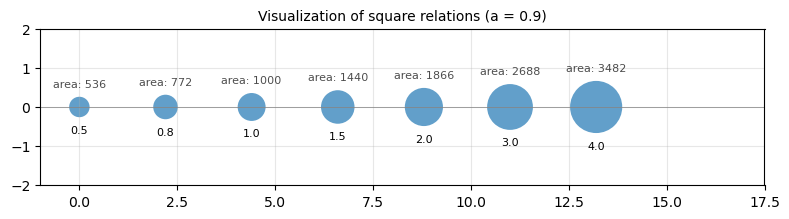

  Numerical ratio 2:1 → Area: 1.87:1, Radii: 1.37:1


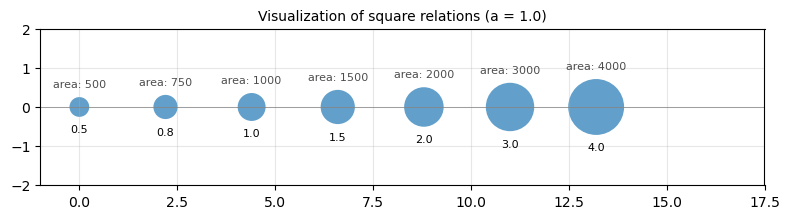

  Numerical ratio 2:1 → Area: 2.00:1, Radii: 1.41:1


In [37]:
from matplotlib.patches import Circle

def plot_circles_with_exponent(a, ratios, base):
    areas = base * (ratios ** a)
    radii = np.sqrt(areas/np.pi)
    
    fig, ax = plt.subplots(1, 1, figsize = (8,4))
    for i, r in enumerate(radii):
        circ = Circle((i*2.2, 0), r/50.0, fill=True, alpha=0.7)
        ax.add_patch(circ)
        ax.text(i*2.2, -r/50.0 - 0.2, f'{ratios[i]:.1f}',ha='center', va='top', fontsize=8)
        ax.text(i*2.2, r/50.0 + 0.2, f'area: {areas[i]:.0f}',ha='center', va='bottom', fontsize=8, alpha=0.7)

    ax.set_xlim(-1, len(ratios) * 2.5)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_title(f'Visualization of square relations (a = {a})', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='gray', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return radii, areas
    
a_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

results = {}
for a in a_values:
    radii, areas = plot_circles_with_exponent(a, ratios, base)
    results[a] = {'radii': radii, 'areas': areas}
    idx_1 = np.where(ratios == 1)[0][0]
    idx_2 = np.where(ratios == 2)[0][0]
    
    perceived_ratio_areas = areas[idx_2] / areas[idx_1]
    perceived_ratio_radii = radii[idx_2] / radii[idx_1]
    
    print(f"  Numerical ratio 2:1 → Area: {perceived_ratio_areas:.2f}:1, Radii: {perceived_ratio_radii:.2f}:1")
    

### Results
The indicator a =0.9 makes doubling the most fair, because with a small indicator, the visual difference between the areas is almost invisible, but with a value of a = 1, the area looks larger than expected. At the same time, the actual area ratio for a=0.9 is 1.87:1, close to the desired, and the ratio of radii is 1.41:1.

## 5. Univariate: Histogram vs ECDF vs Violin/KDE (Design Critique)
**Goal:** Compare encodings for univariate distributions and argue trade-offs.

**Data:** `plotly.express.data.tips()`.

In [40]:
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> `px.histogram(...)`, `px.ecdf(...)`, and `px.violin(...)` can be useful.

In [42]:

# TODO: Show
# (1) Histogram with appropriate bin rule (e.g., Freedman–Diaconis)
# (2) Empirical CDF
# (3) Violin or KDE curve (annotate bandwidth choice)
# Then compare insights about skew, outliers, and tail behavior. Which channel(s) best support comparisons?



The number of bins (Friedman-Diakonis): 13


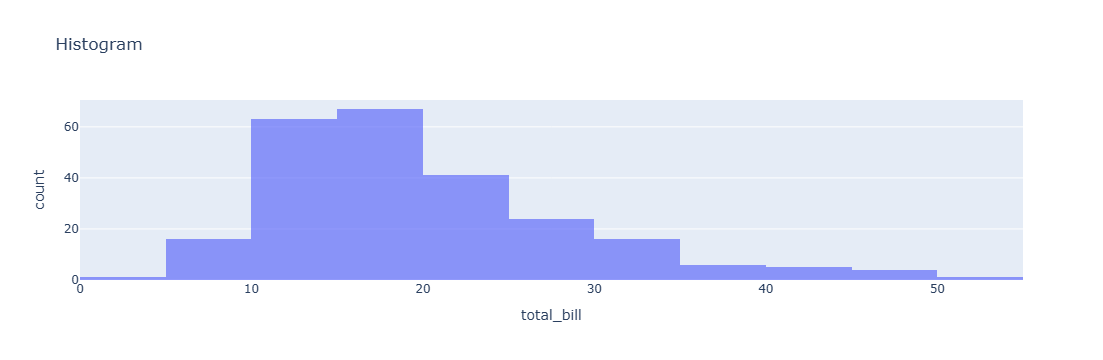

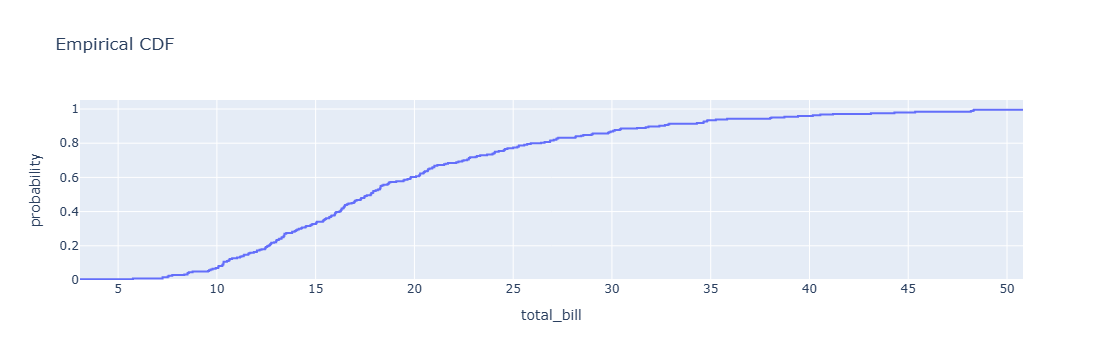

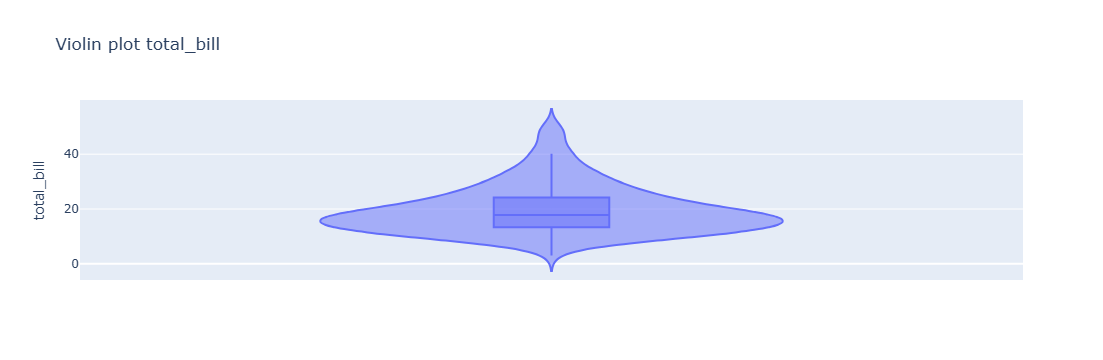

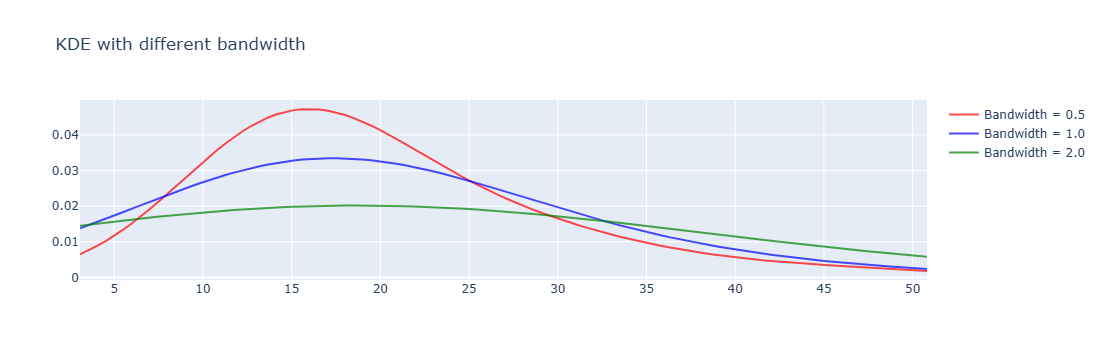

Asymmetry: 1.126
IQR: 10.78
Threshold for emissions (Q3 + 1.5*IQR): 40.30
Number of emissions: 9
Share of emissions: 3.7%

Tail analysis:
The top 10%: from 32.40 till 50.81
The top 5%: from 38.07 till 50.81


In [48]:
# Calculating the optimal number of bins according to the Friedman-Diakonis rule
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    n = len(data)
    bin_width = 2 * iqr / (n ** (1/3))
    bin_count = int((data.max() - data.min()) / bin_width)
    return max(1, bin_count)

fd_bins = freedman_diaconis_bins(tips['total_bill'])
print(f"\nThe number of bins (Friedman-Diakonis): {fd_bins}")

hist_fig = px.histogram(tips, x='total_bill', nbins=fd_bins, title='Histogram', opacity=0.7)
hist_fig.show()

# Empirical CDF
ecdf_fig = px.ecdf(tips, x='total_bill', title='Empirical CDF')
ecdf_fig.show()

# Violin plot
violin_fig = px.violin(tips, y='total_bill', title='Violin plot total_bill', box=True, points=False)
violin_fig.show()

# KDE with different bandwidth
import plotly.figure_factory as ff
import plotly.graph_objects as go

fig_kde = go.Figure()
bandwidths = [0.5, 1.0, 2.0]
colors = ['red', 'blue', 'green']

for bw, color in zip(bandwidths, colors):
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(tips['total_bill'], bw_method=bw)
    x_range = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
    y_kde = kde(x_range)
    
    fig_kde.add_trace(go.Scatter(x=x_range, y=y_kde, mode='lines', name=f'Bandwidth = {bw}', line=dict(color=color, width=2), opacity=0.7))

fig_kde.update_layout(title='KDE with different bandwidth')
fig_kde.show()

from scipy.stats import skew, kurtosis

skewness = skew(tips['total_bill'])
kurt = kurtosis(tips['total_bill'])
q1, q3 = tips['total_bill'].quantile([0.25, 0.75])
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr
outliers = tips[tips['total_bill'] > outlier_threshold]

print(f"Asymmetry: {skewness:.3f}")
print(f"IQR: {iqr:.2f}")
print(f"Threshold for emissions (Q3 + 1.5*IQR): {outlier_threshold:.2f}")
print(f"Number of emissions: {len(outliers)}")
print(f"Share of emissions: {len(outliers)/len(tips)*100:.1f}%")

print("\nTail analysis:")
# Tail analysis
tail_90 = tips[tips['total_bill'] > tips['total_bill'].quantile(0.90)]
tail_95 = tips[tips['total_bill'] > tips['total_bill'].quantile(0.95)]

print(f"The top 10%: from {tail_90['total_bill'].min():.2f} till {tail_90['total_bill'].max():.2f}")
print(f"The top 5%: from {tail_95['total_bill'].min():.2f} till {tail_95['total_bill'].max():.2f}")

### Results
1. The presence of asymmetry on the right side is best reflected by the histogram and KDE.
2. The best channel for emissions is a violin and a box with a mustache.
3. ECDF shows the behavior of heavy tails well, demonstrating that the top 5% of values occupy a disproportionately large area.

# Part B – Data Types

## 6. Multidimensional: PCA vs t-SNE (and parallel coordinates)
**Goal:** Contrast linear vs nonlinear projection for class separation; add a high‑dimensional view.

**Data:** `sklearn.datasets.load_wine()`.

In [51]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates

X, y = load_wine(return_X_y=True, as_frame=True)
labels = load_wine().target
names = load_wine().feature_names
df = X.copy()
df['target'] = labels
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


> look at the docs for `parallel_coordinates` in `pandas.plotting`

In [ ]:

# TODO:
# A) Standardize features; run PCA (2D). Plot with class color.
# B) Run t‑SNE (2D). Plot with class color; discuss perplexity and random_state.
# C) Parallel coordinates or radial plot for a subset of features to connect back to raw space.
# Conclude: when does each method help or mislead?


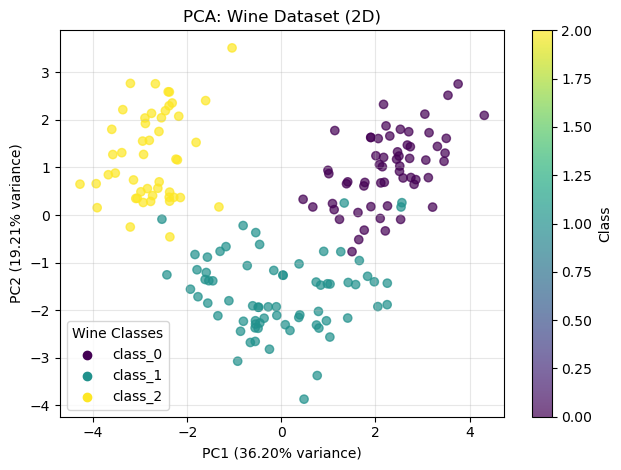

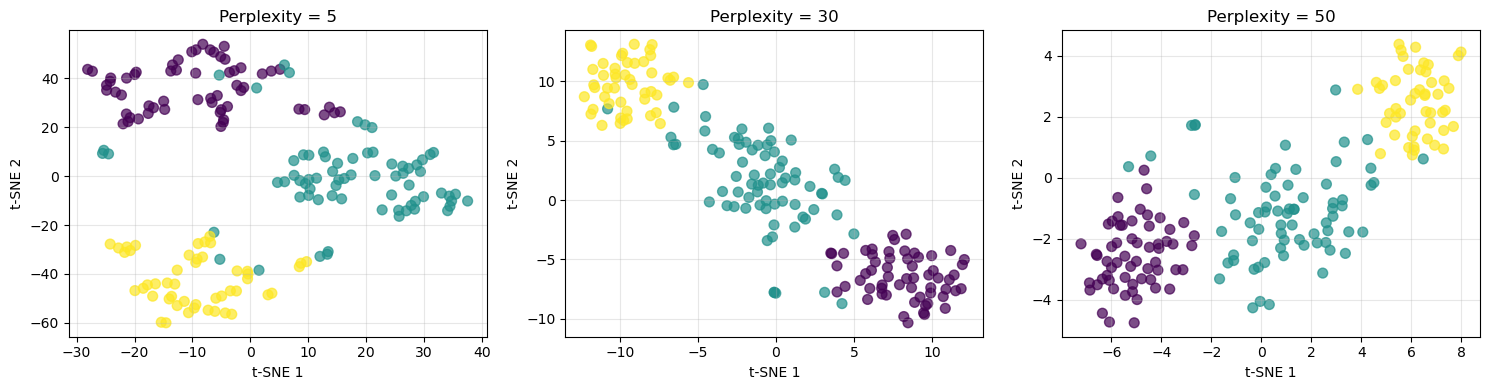

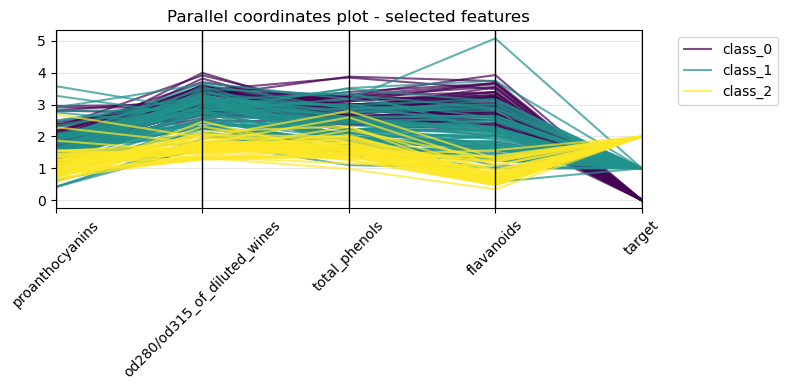

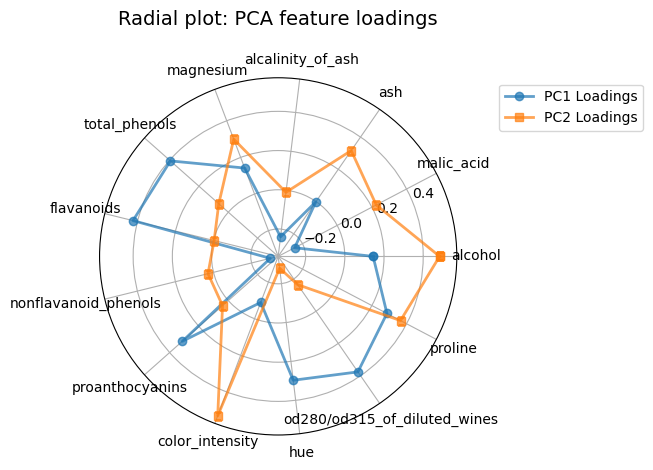

In [55]:
target_names = load_wine().target_names
# Standardize features; run PCA (2D)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: Wine Dataset (2D)')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)

for i, class_name in enumerate(target_names):
    plt.scatter([], [], c=[plt.cm.viridis(i / 2)], label=class_name)
plt.legend(title='Wine Classes')

plt.tight_layout()
plt.show()

# t‑SNE (2D)
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
                            cmap='viridis', alpha=0.7, s=50)
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')
    axes[i].set_title(f'Perplexity = {perplexity}')
    axes[i].grid(True, alpha=0.3)
# 
plt.tight_layout()
plt.show()


# Parallel coordinates plot
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=names)

top_features_idx = np.argsort(np.abs(pca.components_[0]))[-4:] 
top_features = [names[i] for i in top_features_idx]

subset_df = df[top_features + ['target']].copy()
subset_df['class_name'] = [target_names[i] for i in df['target']]

# Parallel coordinates plot
plt.figure(figsize=(8, 4))
parallel_coordinates(subset_df, 'class_name', alpha=0.7, colormap='viridis')
plt.title('Parallel coordinates plot - selected features')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots( subplot_kw=dict(projection='polar'))

loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]

angles = np.linspace(0, 2*np.pi, len(names), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

values_pc1 = np.concatenate((loadings_pc1, [loadings_pc1[0]]))
ax.plot(angles, values_pc1, 'o-', linewidth=2, label='PC1 Loadings', alpha=0.7)

values_pc2 = np.concatenate((loadings_pc2, [loadings_pc2[0]]))
ax.plot(angles, values_pc2, 's-', linewidth=2, label='PC2 Loadings', alpha=0.7)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(names, fontsize=10)
ax.set_title('Radial plot: PCA feature loadings', size=14, pad=20)
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

### Results
#### Perplexity analisys
1. Perplexity shows the degree of balance between local and global structure. Low values create many small isolated clusters, but they can skip more global connections, so they are suitable for dense data.
2. High Perplexity values may lose small details, but emphasize the global structure by combining clusters. They are suitable for sparse data.
3. Average Perplexity values are most often used because of the optimal and interpretable result, suitable for large datasets and mixed data structures.
#### Random state analisys
A fixed Random_state value ensures reproducibility, and different values can produce qualitatively similar but quantitatively different results.

#### Methods analysys
1. The PCA method is useful for understanding the global data structure, identification of the main directions of variability, dimensionality reduction with minimal loss of information and interpretation of the contribution of the initial features. However, with nonlinear dependencies between features, it can be misleading.
2. The t-SNE method is useful for visualization of complex nonlinear structures and identification of local clusters and neighborhoods. But on choosing incorrect perplexity and random state, they can give questionable results.
3. The parallel coordinates method is useful for understanding the contribution of individual features to classification, identification of patterns and correlations between features and connections to the original feature space. However, with a large number of features, visual noise and line overlap may occur, so it is better to perform a PCA analysis before doing this.


## 7. Time Series: Seasonality & Anomaly Bands
**Goal:** Build a seasonal profile and detect anomalies with rolling stats & robust thresholds.

**Data:** Synthetic daily series with weekly seasonality + noise.

In [58]:
rng = np.random.default_rng(1)
days = pd.date_range('2023-01-01', periods=400, freq='D')
season = 10 + 3*np.sin(2*np.pi*days.dayofyear/7)  # weekly-ish
noise = rng.normal(0, 1.2, len(days))
spikes = (rng.random(len(days)) < 0.03) * rng.normal(6, 1.5, len(days))
y = season + noise + spikes
ts = pd.Series(y, index=days, name='y')
ts.head()


2023-01-01    12.760195
2023-01-02    13.910726
2023-01-03    11.698176
2023-01-04     7.134560
2023-01-05     8.161643
Freq: D, Name: y, dtype: float64

> `statsmodels` lib: `seasonal_decompose`, `STL` and `rolling` can be useful.

In [ ]:

# TODO:
# - Decompose trend/season using rolling means or STL (if statsmodels available).
# - Create prediction bands via rolling median ± k*MAD.
# - Flag anomalies and visualize them with distinct symbols and color.
# - Evaluate precision/recall against a synthetic ground truth (spikes>0).


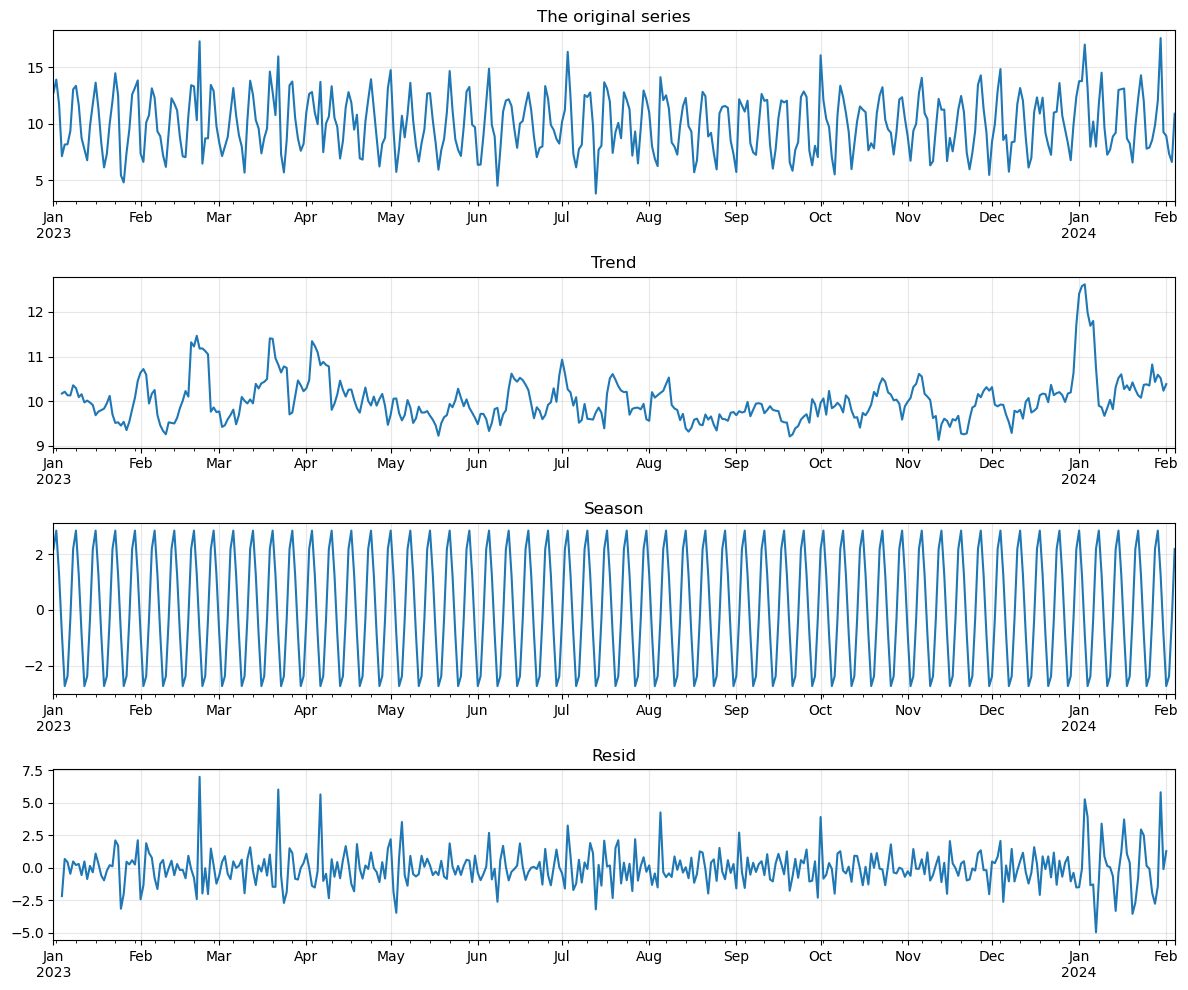

The number of anomalies: 11


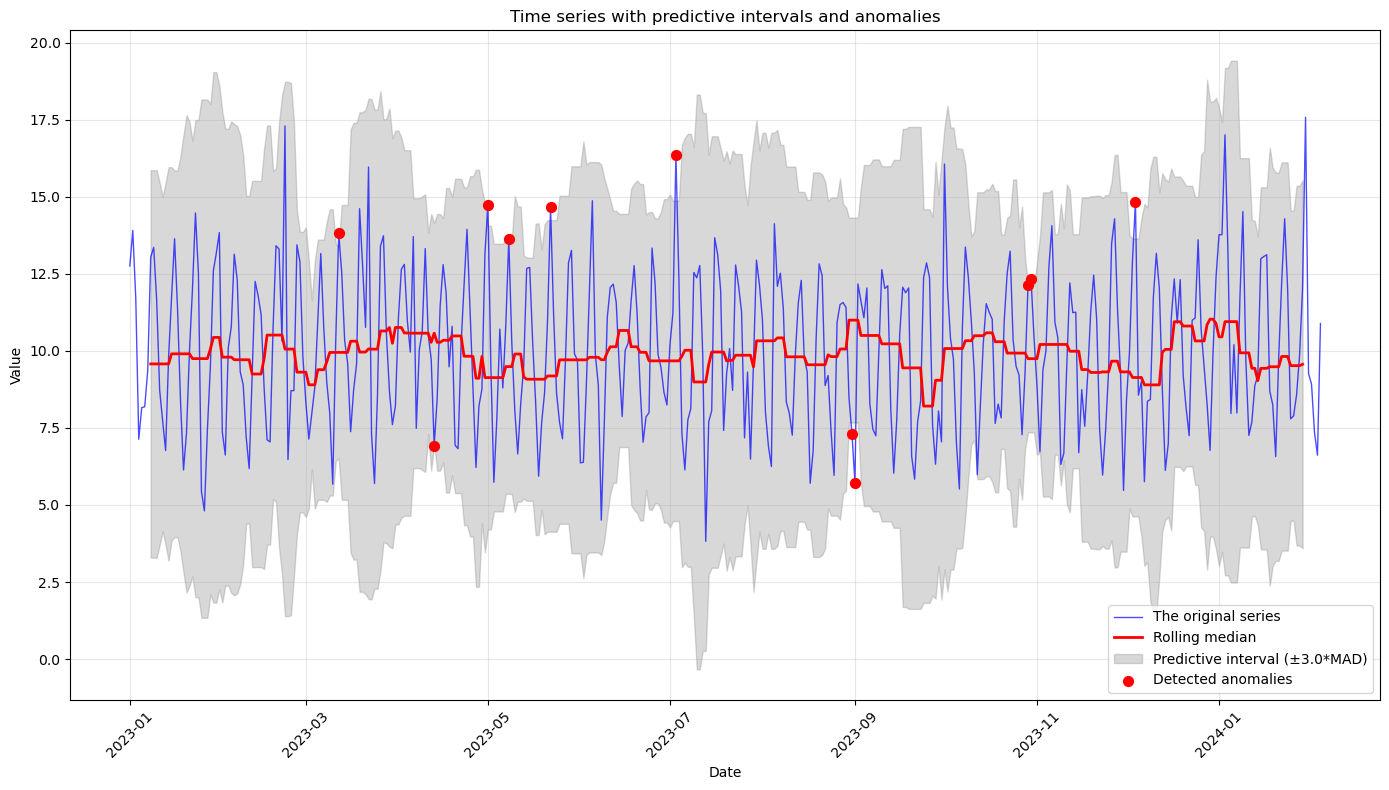

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition of time series
decomposition = seasonal_decompose(ts, model='additive', period=7) 

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=axes[0], title='The original series')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Season')
decomposition.resid.plot(ax=axes[3], title='Resid')

for ax in axes:
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Creating predictive intervals and detecting anomalies
window = 14 
rolling_median = ts.rolling(window=window, center=True).median()
rolling_mad = ts.rolling(window=window, center=True).apply(lambda x: np.median(np.abs(x - np.median(x))))

k = 3.0
upper_band = rolling_median + k * rolling_mad
lower_band = rolling_median - k * rolling_mad

anomalies = (ts > upper_band) | (ts < lower_band)
anomaly_points = ts[anomalies]

print(f"The number of anomalies: {anomalies.sum()}")

plt.figure(figsize=(14, 8))

plt.plot(ts.index, ts, label='The original series', color='blue', alpha=0.7, linewidth=1)
plt.plot(rolling_median.index, rolling_median, label='Rolling median', color='red', linewidth=2)
plt.fill_between(rolling_median.index, lower_band, upper_band, alpha=0.3, color='gray', label=f'Predictive interval (±{k}*MAD)')
plt.scatter(anomaly_points.index, anomaly_points, color='red', s=50, zorder=5, label='Detected anomalies')

plt.title('Time series with predictive intervals and anomalies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Geodata: Choropleth vs Proportional Symbols
**Goal:** Compare two map encodings for rates vs counts.

**Data:** `plotly.express.data.gapminder()` 2007 subset (population, lifeExp, gdpPercap).

In [60]:

import plotly.express as px
gap = px.data.gapminder().query("year == 2007")
gap.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


> plotly express has several built-in map functions, e.g. `px.choropleth(...)` and `px.scatter_geo(...)`.

In [ ]:

# TODO:
# A) Choropleth: life expectancy (rate) by country; describe your color scale choice.
# B) Proportional symbols: population (count) as circle area; add color for region.
# Discuss which task each map supports better and common pitfalls (e.g., area vs density).


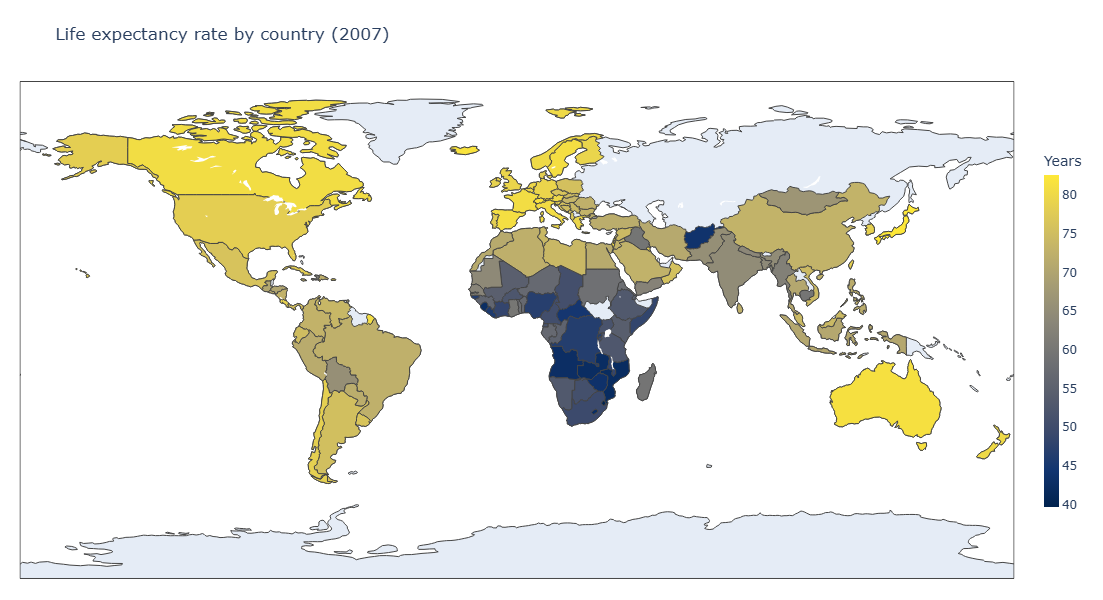

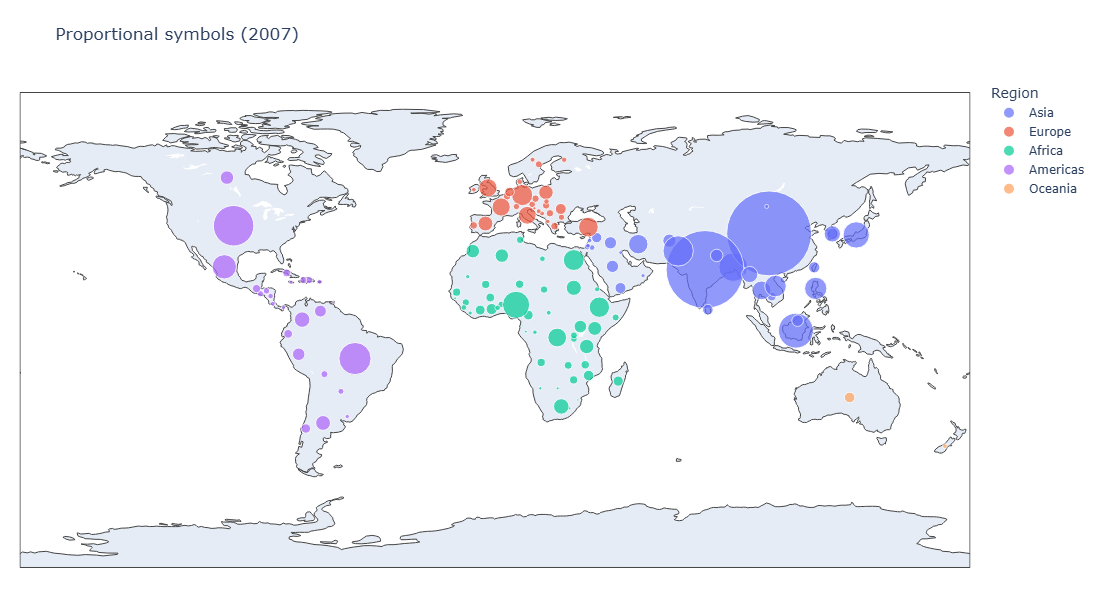

In [62]:
# Choropleth: life expectancy (rate) by country
fig_choropleth = px.choropleth(
    gap,
    locations="iso_alpha",
    color="lifeExp", 
    hover_name="country", 
    hover_data={
        "lifeExp": ":.1f",
        "pop": ":,", 
        "gdpPercap": ":$.0f"
    },
    color_continuous_scale="Cividis", # The color scale is used for sequential data, while it is suitable for people with impaired color perception.
    range_color=[gap['lifeExp'].min(),gap['lifeExp'].max()],
    title="Life expectancy rate by country (2007)",
    labels={"lifeExp": "Life expectancy"}
)

fig_choropleth.update_layout(
    width=1000,
    height=600,
    margin=dict(l=20, r=20, t=80, b=20),
    coloraxis_colorbar=dict(
        title="Years",
        thickness=15,
        len=0.75
    )
)

fig_choropleth.show()

# Proportional symbols: population (count) as circle area,  color for region

fig_scatter = px.scatter_geo(
    gap,
    locations="iso_alpha",
    size="pop", 
    color="continent", 
    hover_name="country",
    hover_data={
        "pop": ":,",
        "lifeExp": ":.1f",
        "gdpPercap": ":$.0f"
    },
    size_max=60, 
    title="Proportional symbols (2007)",
    labels={"pop": "Proportional", "continent": "Region"}
)

fig_scatter.update_layout(
    width=1000,
    height=600,
    margin=dict(l=20, r=20, t=80, b=20),
    coloraxis_colorbar=dict(
        title="Region",
        thickness=15,
        len=0.75
    )
)

fig_scatter.show()

### Results
1. A choropleth is better suited for transmitting the degree of intensity and density of quantities on a map, displaying continuous data, and identifying geographic patterns.
2. Proportional symbols are suitable for displaying the distribution of discrete quantities, comparing scales between objects, and combining data encoding through area and color.
3. The problem of the relationship between density and area can be solved by using proportional symbols. It is also worth considering cultural peculiarities when choosing a color rendering.

## 9. Graph Data: Weighted Network Encoding
**Goal:** Encode edge weights and node attributes with channels that remain readable.

**Data:** Synthetic weighted graph.

In [65]:
import networkx as nx

rng = np.random.default_rng(0)
G = nx.gnm_random_graph(18, 35, seed=1)
for u, v in G.edges():
    G[u][v]['w'] = float(rng.uniform(0.2, 1.0))
for n in G.nodes():
    G.nodes[n]['score'] = float(rng.normal(0, 1))

pos = nx.spring_layout(G, seed=2)
list(G.edges(data=True))[:3]


[(0, 15, {'w': 0.7095693498571636}),
 (0, 14, {'w': 0.4158293710110963}),
 (0, 17, {'w': 0.23277881914895576})]

> You can play with networkx. It is very powerful for graph generation and layout and works well with matplotlib and plotly.
>
> In fact, networkx visualization functions are just beautifully decorated matplotlib functions.

In [ ]:

# TODO:
# - Map edge weight to stroke width (and maybe alpha) with a perceptually linear mapping.
# - Map node score to a diverging color scale, but keep color-bin count moderate.
# - Add a small legend panel explaining encodings. Ensure labels don't overlap.
# - Reflect on clutter vs information density trade-offs.


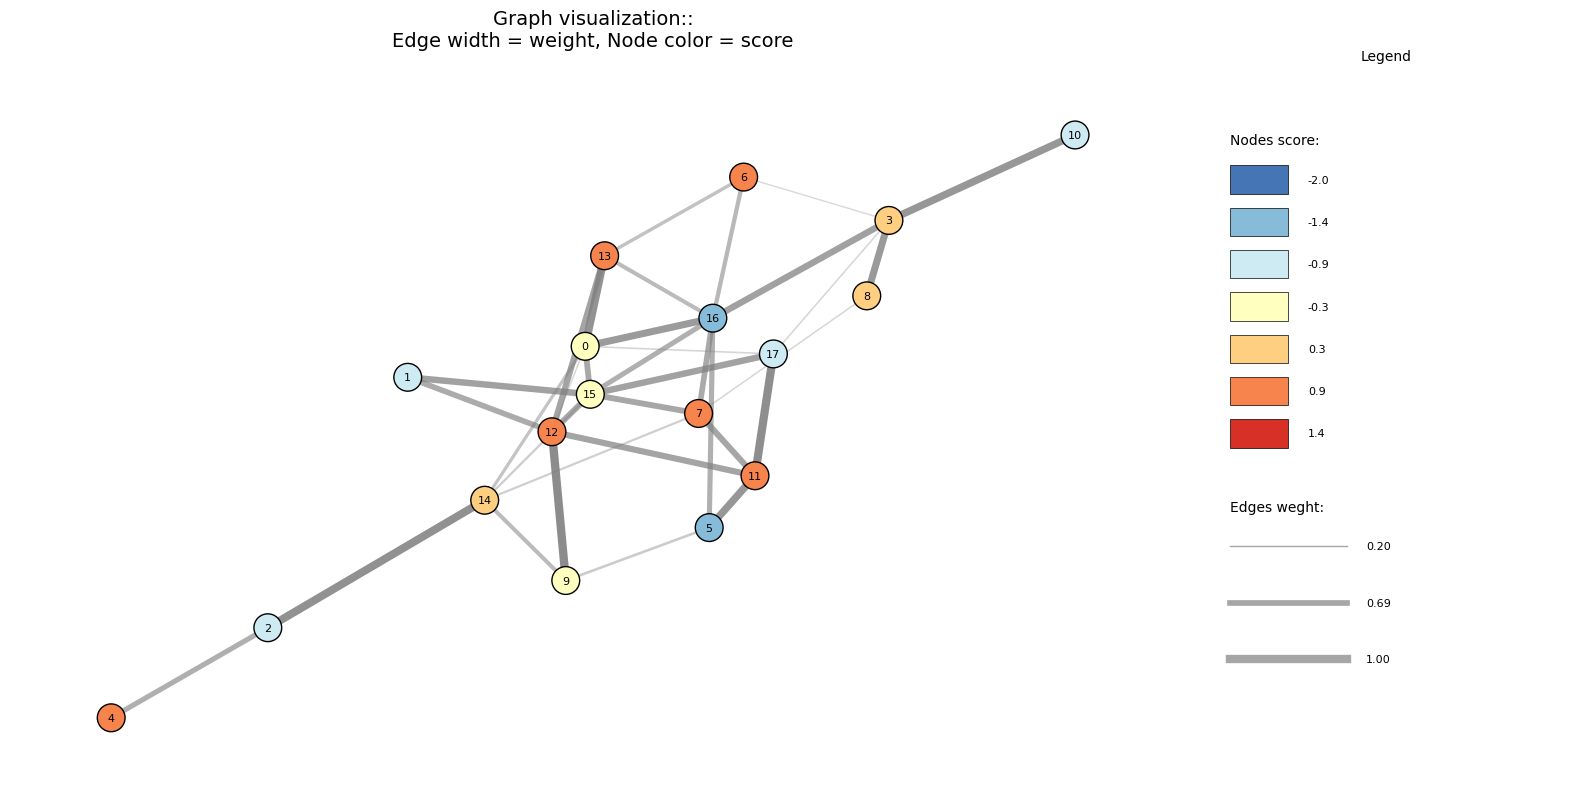

In [69]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# Mapping edge weight to stroke width
edge_weights = [G[u][v]['w'] for u, v in G.edges()]
node_scores = [G.nodes[n]['score'] for n in G.nodes()]
min_width, max_width = 1.0, 6.0
edge_widths = [min_width + (w - min(edge_weights)) * (max_width - min_width) / (max(edge_weights) - min(edge_weights)) for w in edge_weights]

# Alpha mapping
min_alpha, max_alpha = 0.3, 0.9
edge_alphas = [min_alpha + (w - min(edge_weights)) * (max_alpha - min_alpha) / (max(edge_weights) - min(edge_weights)) for w in edge_weights]

# Mapping node score to a diverging color scale
colors_diverging = ['#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf', '#fee090', '#fdae61', '#f46d43','#d73027'] 

n_bins = 7 
cmap = LinearSegmentedColormap.from_list('diverging', colors_diverging, N=n_bins)

# Normalizing scores
vmin, vmax = -2, 2 
node_colors = []
for score in node_scores:
    normalized_score = max(vmin, min(vmax, score))
    bin_index = int((normalized_score - vmin) / (vmax - vmin) * (n_bins - 1))
    node_colors.append(cmap(bin_index))

# Vizualizing with legend
fig, (ax_main, ax_legend) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})

nx.draw_networkx_nodes(G, pos,  node_size=400,node_color=node_colors,edgecolors='black',linewidths=1,ax=ax_main)
edges = nx.draw_networkx_edges(G, pos,width=edge_widths,alpha=edge_alphas,edge_color='gray',ax=ax_main)
nx.draw_networkx_labels(G, pos, ax=ax_main, font_size=8)

ax_main.set_title('Graph visualization::\nEdge width = weight, Node color = score', fontsize=14, pad=20)
ax_main.axis('off')

ax_legend.axis('off')
ax_legend.set_xlim(0, 1)
ax_legend.set_ylim(0, 1)
ax_legend.set_title('Legend', fontsize=10, pad=10)

legend_y = 0.85
ax_legend.text(0.1, legend_y + 0.05, 'Nodes score:', fontsize=10)
color_bin_labels = [f'{vmin:.1f}'] + [f'{(vmin + (i+1)*(vmax-vmin)/n_bins):.1f}' for i in range(n_bins-1)] + [f'{vmax:.1f}']

for i in range(n_bins):
    color = cmap(i)
    y_pos = legend_y - i * 0.06
    rect = mpatches.Rectangle((0.1, y_pos - 0.02), 0.15, 0.04, facecolor=color, edgecolor='black', linewidth=0.5)
    ax_legend.add_patch(rect)
    ax_legend.text(0.3, y_pos, color_bin_labels[i], fontsize=8, va='center')

legend_y_edges = legend_y - n_bins * 0.06 - 0.1
ax_legend.text(0.1, legend_y_edges + 0.05, 'Edges weght:', fontsize=10)
example_widths = [min(edge_weights), np.median(edge_weights), max(edge_weights)]
example_widths_scaled = [min_width + (w - min(edge_weights)) * (max_width - min_width) / (max(edge_weights) - min(edge_weights)) for w in example_widths]

for i, (width, original_w) in enumerate(zip(example_widths_scaled, example_widths)):
    y_pos = legend_y_edges - i * 0.08
    ax_legend.plot([0.1, 0.4], [y_pos, y_pos], 
                  linewidth=width, color='gray', alpha=0.7)
    ax_legend.text(0.45, y_pos, f'{original_w:.2f}', fontsize=8, va='center')

plt.tight_layout()
plt.show()

### Rwsults
Problem: edges that are too wide can overlap nodes and create a noisy image. To improve perception, you can add line transparency with a second channel.
The divergent vertex color scale highlights deviations from the neutral state.


## 10. From Messy Table to Tidy Data & Design Justification
**Goal:** Reshape a messy dataset, choose an appropriate visualization per variable type, and justify.

**Data:** Create a messy pivoted table with mixed types; then tidy it.

In [72]:
rng = np.random.default_rng(12)
departments = ['Sales','Ops','R&D']
quarters = ['Q1','Q2','Q3','Q4']
metrics = ['revenue','units','nps']  # mix numeric + ordinal-like
rows = []
for d in departments:
    row = {'department': d}
    for q in quarters:
        row[f'{q}_revenue'] = int(rng.normal(120000, 30000))
        row[f'{q}_units'] = int(rng.normal(500, 120))
        row[f'{q}_nps'] = int(rng.normal(30, 15))
    rows.append(row)
messy = pd.DataFrame(rows)
messy.head()


,department,Q1_revenue,Q1_units,Q1_nps,Q2_revenue,Q2_units,Q2_nps,Q3_revenue,Q3_units,Q3_nps,Q4_revenue,Q4_units,Q4_nps
0,Sales,119795,625,41,141718,694,11,101191,341,28,149962,497,37
1,Ops,62676,517,16,173261,606,44,118264,573,39,109667,440,28
2,R&D,101836,428,25,98147,591,6,144706,424,21,79474,482,26


> This one is really hard. I made (most of) dataset stuff (with one small error) for you to ease the task.

In [74]:
# TODO:
# 1) Tidy the table into long form with variables [department, quarter, metric, value].
# 2) Choose: small multiples line for revenue (time), bars/ECDF for units, ordered dot/interval for NPS.

import altair as alt

m = messy.melt(id_vars='department', var_name='q_metric', value_name='value')
m[['quarter','metric']] = m['q_metric'].str.extract(r'(Q[1-4])_(\w+)')
tidy = m.drop(columns=['q_metric']).pivot_table(index=['department','quarter'], columns='metric', values='value')
tidy.head()

metric               nps   revenue  units
department quarter                       
Ops        Q1       16.0   62676.0  517.0
           Q2       44.0  173261.0  606.0
           Q3       39.0  118264.0  573.0
           Q4       28.0  109667.0  440.0
R&D        Q1       25.0  101836.0  428.0

In [76]:
# Removing the index to have only columns
tidy_reset = tidy.reset_index()
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
tidy_reset['quarter'] = pd.Categorical(tidy_reset['quarter'], categories=quarter_order, ordered=True)

# Multiples line for revenue
revenue_chart = alt.Chart(tidy_reset).mark_line(point=True).encode(
    x=alt.X('quarter:N', title='Quarter', sort=quarter_order),
    y=alt.Y('revenue:Q', title='Revenue', axis=alt.Axis(format='$,.0f')),
    color=alt.Color('department:N', title='Department'), 
    tooltip=['department', 'quarter', alt.Tooltip('revenue:Q', format='$,.0f')]
).properties(
    width=700,
    height=400    
)

# Bar chart for units
units_chart = alt.Chart(tidy_reset).mark_bar().encode(
    x=alt.X('quarter:N', title='Quarter', sort=quarter_order, axis=alt.Axis(labelAngle=0)),
    y=alt.Y('units:Q', title='Units'),
    color=alt.Color('department:N', title='Department'),
    xOffset=alt.XOffset('department:N'),
    tooltip=['department', 'quarter', 'units:Q']
).properties(
    width=600,
    height=400   
)

# Dots chart for NPS
nps_chart = alt.Chart(tidy_reset).mark_circle(size=60).encode(
    x=alt.X('department:N', title='Department'),
    y=alt.Y('nps:Q', title='NPS Score'),
    color=alt.Color('quarter:N', title='Quarter')
).properties(
    width=600,
    height=200    
)

# Horizontal layout of all graphs
combined_chart = alt.hconcat(
    revenue_chart.properties(width=300, height=200, title='Revenue dynamics'),
    units_chart.properties(width=300, height=200,  title='Number of units by quarter'),
    nps_chart.properties(width=300, height=200, title='NPS by department and quarter')
).resolve_scale(color='independent')

combined_chart.save('all_charts_combined.html')


D:\Anaconda\Lib\site-packages\altair\utils\core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



In [78]:
from IPython.display import display, HTML
import webbrowser
import os

file_path = os.path.abspath('all_charts_combined.html')
webbrowser.open(f'file://{file_path}')

True